In [1]:
import os
import pandas as pd
import math

# folder path
dir_path  = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/to_ceci/'
save_path = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/'

In [2]:
df_ave_data = pd.DataFrame()

path_pr = "".join([dir_path, "RecallGLOBAL.csv"])
# read text file into pandas DataFrame
df_ave_data = pd.read_csv(path_pr, header=0, sep=',')


## set the 'topic' column as index
df_ave_data.columns = ['topic','0', '1', '2', '3', '4','5']
df_ave_data.set_index('topic', inplace=True)
#df_ave_data = df_ave_data.sort_values(by='topic', ascending=True)

df_ave_data = df_ave_data.drop(['0'], axis=1)

df_ave_data = df_ave_data.transpose()
df_ave_data.to_csv(save_path + 'moeir_globalRecall_evaluation_by_run_last_gen.csv')

df_ave_data

topic,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
1,0.293586,0.285113,0.302610,0.126429,0.422410,0.299390,0.109750,0.256935,0.334655,0.201741,...,0.0640,0.355000,0.173793,0.372366,0.298195,0.051065,0.077290,0.188403,0.107500,0.325395
2,0.162929,0.310508,0.058795,0.135357,0.253620,0.203049,0.051167,0.273952,0.430345,0.193682,...,0.0310,0.352667,0.163736,0.302581,0.286248,0.056331,0.124112,0.152577,0.116511,0.234737
3,0.352475,0.528616,0.166185,0.187143,0.350908,0.199512,0.150167,0.189516,0.311034,0.095920,...,0.0320,0.155833,0.169368,0.259570,0.258566,0.077101,0.045421,0.103193,0.113187,0.263947
4,0.179798,0.414040,0.296225,0.174464,0.232922,0.221463,0.136750,0.230726,0.288621,0.134179,...,0.0372,0.341833,0.196207,0.085269,0.416796,0.046982,0.019159,0.108866,0.062967,0.335132
5,0.293081,0.445960,0.210964,0.129464,0.311804,0.271829,0.078417,0.191613,0.337759,0.210000,...,0.0604,0.358750,0.154598,0.333548,0.331062,0.064438,0.037196,0.092479,0.121978,0.206842


In [3]:

stats_by_topic = df_ave_data.agg(['mean', 'count', 'std'])
stats_by_topic

,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
mean,0.256374,0.396847,0.206956,0.150571,0.314333,0.239049,0.10525,0.228548,0.340483,0.167104,...,0.04492,0.312817,0.171540,0.270667,0.318173,0.059183,0.060636,0.129104,0.104429,0.273211
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
std,0.081491,0.100012,0.100932,0.028143,0.076385,0.044396,0.04085,0.037947,0.054022,0.049743,...,0.01600,0.087982,0.015542,0.111592,0.060959,0.011953,0.041255,0.040279,0.023765,0.055965


In [4]:
stats_all_topics =stats_by_topic.transpose()
stats_all_topics

,mean,count,std
1,0.256374,5.0,0.081491
134,0.396847,5.0,0.100012
187,0.206956,5.0,0.100932
215,0.150571,5.0,0.028143
221,0.314333,5.0,0.076385
25,0.239049,5.0,0.044396
259,0.105250,5.0,0.040850
289,0.228548,5.0,0.037947
350,0.340483,5.0,0.054022
363,0.167104,5.0,0.049743


In [5]:
stats_all_topics['mean'].describe().transpose()


t = pd.DataFrame({  'mean_gr': [stats_all_topics['mean'].mean()],                    
                    'count_gr': [stats_all_topics['mean'].count()],
                    'std_gr': [stats_all_topics['mean'].std()]})

ci95_hi = []
ci95_lo = []

m, c, s = t.loc[0]

ci95_hi.append(m + 1.96*s/math.sqrt(c))
ci95_lo.append(m - 1.96*s/math.sqrt(c))

t['ci95_lo_gr'] = ci95_lo
t['ci95_hi_gr'] = ci95_hi


t.to_csv(save_path + 'moeir_globalRecall_evaluation_stats_last_gen.csv')
t

,mean_gr,count_gr,std_gr,ci95_lo_gr,ci95_hi_gr
0,0.229992,25,0.134618,0.177222,0.282762


Text(0.5, 0.98, 'global Recall  - MOEIR ')

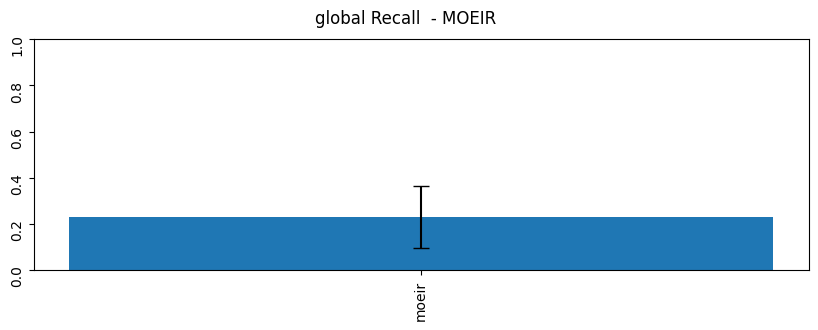

In [6]:
######### global Recall
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1,1, figsize=(10, 3), sharey=False)
axs.tick_params(labelrotation=90)
axs.bar('moeir', t['mean_gr'], yerr=t['std_gr'], capsize=6)
axs.set_ylim(0,1)
fig.suptitle('global Recall  - MOEIR ')